# Does Field of Study and Job Role Predict Career Success? A Gender-Based Comparative Analysis

### Bongi Nkowane - 225235871 | Learning from Data 251ISM8X04 Assignment 3

# Importing Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Introduction and Background about my Dataset

##### As a full-time employee and part-time student, I find the topic of graduate salary offers particularly compelling. It raises important questions about the factors that influence starting salaries, such as gender, field of study, age, and academic performance (e.g., GPA). Additionally, the level at which individuals enter the workforce; whether entry-level, mid-level, or senior roles may significantly impact earning potential. Exploring disparities in earnings between males and females across various job levels and fields of study is particularly relevant within the broader context of ongoing global discussions on inequality. Such considerations provide a meaningful foundation for analyzing the relationship between education and career outcomes.

##### This dataset examines the connection between academic performance and career success, comprising 5,000 records detailing students’ educational backgrounds, skillsets, and career outcomes. It supports a wide range of analyses, including predicting job success based on education, identifying key salary influencers, and evaluating the impact of networking and internships on career advancement. Additional information about the dataset is available at: https://www.kaggle.com/datasets/adilshamim8/education-and-career-success


# Method Used and why

##### To analyze this dataset, I will use descriptive statistical methods. The analysis will begin with a visual overview of the data, followed by a structured breakdown of various types of descriptive statistics. This will include measures of central tendency, measures of dispersion, count-based measures, distribution shape, variability, and relational insights; covering a total of 21 descriptive statistics. To enhance clarity and accessibility, the findings will be accompanied by a range of visualizations, allowing for a quick and intuitive understanding of the data. The analysis will conclude with a comprehensive summary of key insights derived from the data.

# Visual of Raw Data

In [13]:
df = pd.read_excel('education_career_success_B.xlsx')
df.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600,9,5,Entry,2,No


# Descriptive Statistics

## Measure of Central Tendency

In [16]:
mean = df['Starting_Salary'].mean()
median = df['Starting_Salary'].median()
mode = df['Starting_Salary'].mode()[0]
geometric_mean = stats.gmean(df['Starting_Salary'])
harmonic_mean = stats.hmean(df['Starting_Salary'])

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Geometric Mean:", geometric_mean)
print("Harmonic Mean:", harmonic_mean)

Mean: 50563.54
Median: 50300.0
Mode: 25000
Geometric Mean: 48388.725812394
Harmonic Mean: 46118.37495155458


## Measure of Dispersion (Spread of data)

In [17]:
minimum = df['Starting_Salary'].min()
maximum = df['Starting_Salary'].max()
range_val = maximum - minimum
variance_sample = df['Starting_Salary'].var()
variance_population = df['Starting_Salary'].var(ddof=0)
std_dev_sample = df['Starting_Salary'].std()
std_dev_population = df['Starting_Salary'].std(ddof=0)

print("Minimum:", minimum)
print("Maximum:", maximum)
print("Range:", range_val)
print("Variance (Sample):", variance_sample)
print("Variance (Population):", variance_population)
print("Standard Deviation (Sample):", std_dev_sample)
print("Standard Deviation (Population):", std_dev_population)

Minimum: 25000
Maximum: 101000
Range: 76000
Variance (Sample): 210103813.4310604
Variance (Population): 210061792.66837418
Standard Deviation (Sample): 14494.958207289195
Standard Deviation (Population): 14493.508638986426


## Count-Based Measures

In [18]:
sum_val = df['Starting_Salary'].sum()
count_val = df['Starting_Salary'].count()

print("Sum:", sum_val)
print("Count:", count_val)

Sum: 252817700
Count: 5000


## Measures of Shape of Distribution

In [19]:
kurtosis_val = df['Starting_Salary'].kurtosis()
skewness_val = df['Starting_Salary'].skew()

print("Kurtosis:", kurtosis_val)
print("Skewness:", skewness_val)

Kurtosis: -0.38499614958138695
Skewness: 0.206658759312597


## Measures of Variability

In [20]:
std_error = df['Starting_Salary'].std() / np.sqrt(count_val)
print("Standard Error:", std_error)

Standard Error: 204.98966482779585


## Relationship Insights

In [24]:
import scipy.stats as st

cv = (df['Starting_Salary'].std() / mean) * 100
ci = st.norm.interval(0.95, loc=mean, scale=std_error)
confidence_level_value = ci[1] - mean

print("Coefficient of Variation (%):", cv)
print("Confidence Interval (95%):", ci)
print("Lower Confidence Interval:", ci[0])
print("Upper Confidence Interval:", ci[1])
print("Confidence Level Value:", confidence_level_value)


Coefficient of Variation (%): 28.66681843733488
Confidence Interval (95%): (50161.767639734586, 50965.312360265416)
Lower Confidence Interval: 50161.767639734586
Upper Confidence Interval: 50965.312360265416
Confidence Level Value: 401.77236026541505


# Analysis Using Graphs

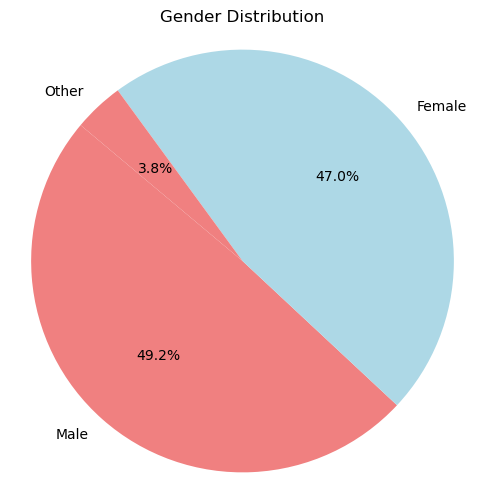

In [81]:
# Store colour list for future use...

gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

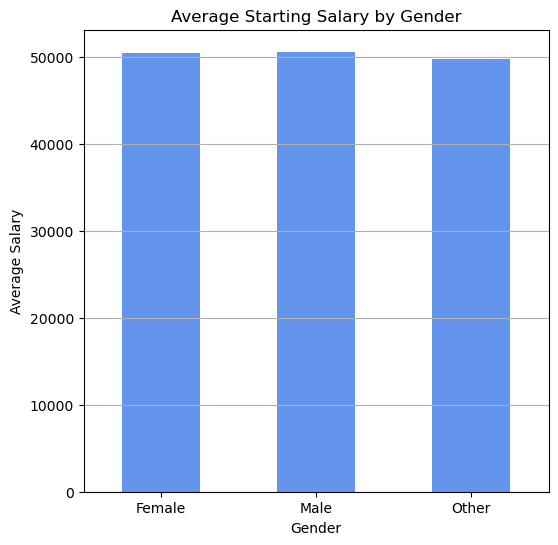

In [54]:
avg_salary_gender = df.groupby('Gender')['Starting_Salary'].mean()
plt.figure(figsize=(6, 6))
avg_salary_gender.plot(kind='bar', color='cornflowerblue')
plt.title('Average Starting Salary by Gender')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


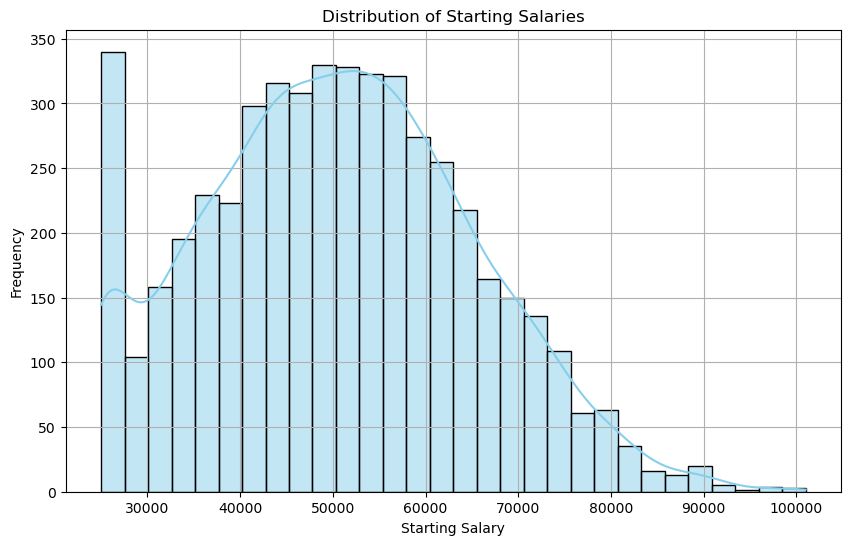

In [42]:
pd.option_context('mode.use_inf_as_na', True)
plt.figure(figsize=(10, 6))
sns.histplot(df['Starting_Salary'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Starting Salaries')
plt.xlabel('Starting Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


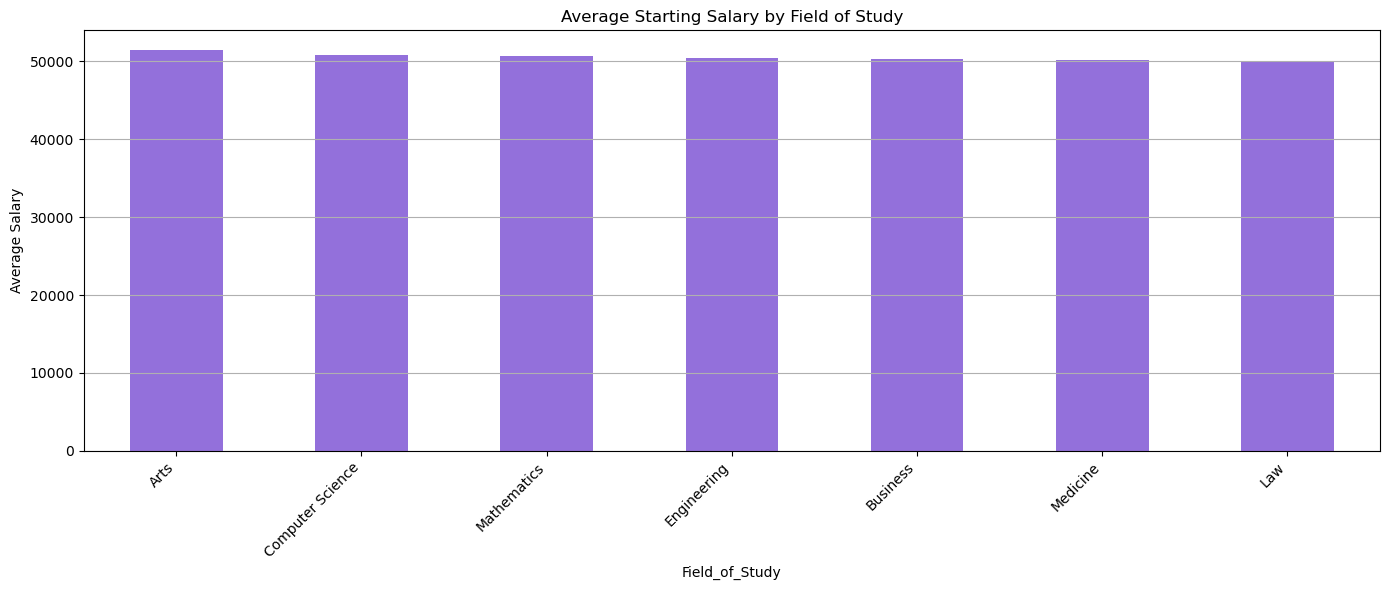

In [57]:
avg_salary_field = df.groupby('Field_of_Study')['Starting_Salary'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
avg_salary_field.plot(kind='bar', color='mediumpurple')
plt.title('Average Starting Salary by Field of Study')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

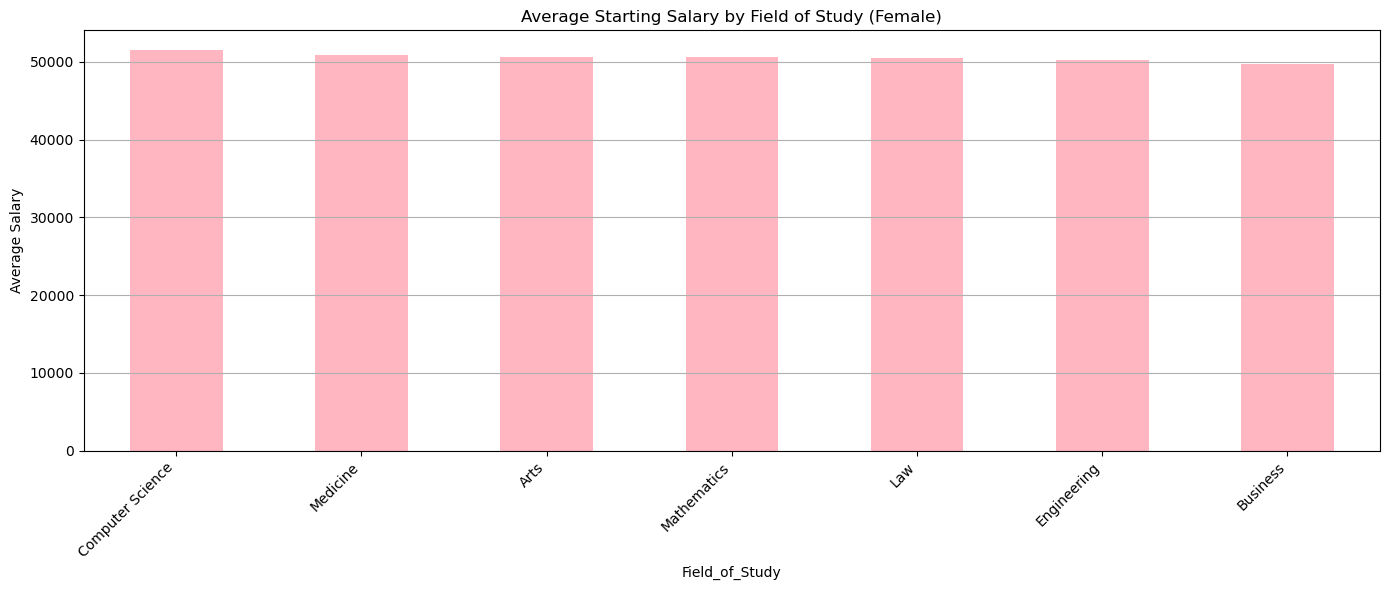

In [82]:
# So I want to segregate/filter by gender, take into account field of study and what the starting salary is...

df_female = df[df['Gender'] == 'Female']

avg_salary_field_female = df_female.groupby('Field_of_Study')['Starting_Salary'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
avg_salary_field_female.plot(kind='bar', color='lightpink')
plt.title('Average Starting Salary by Field of Study (Female)')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

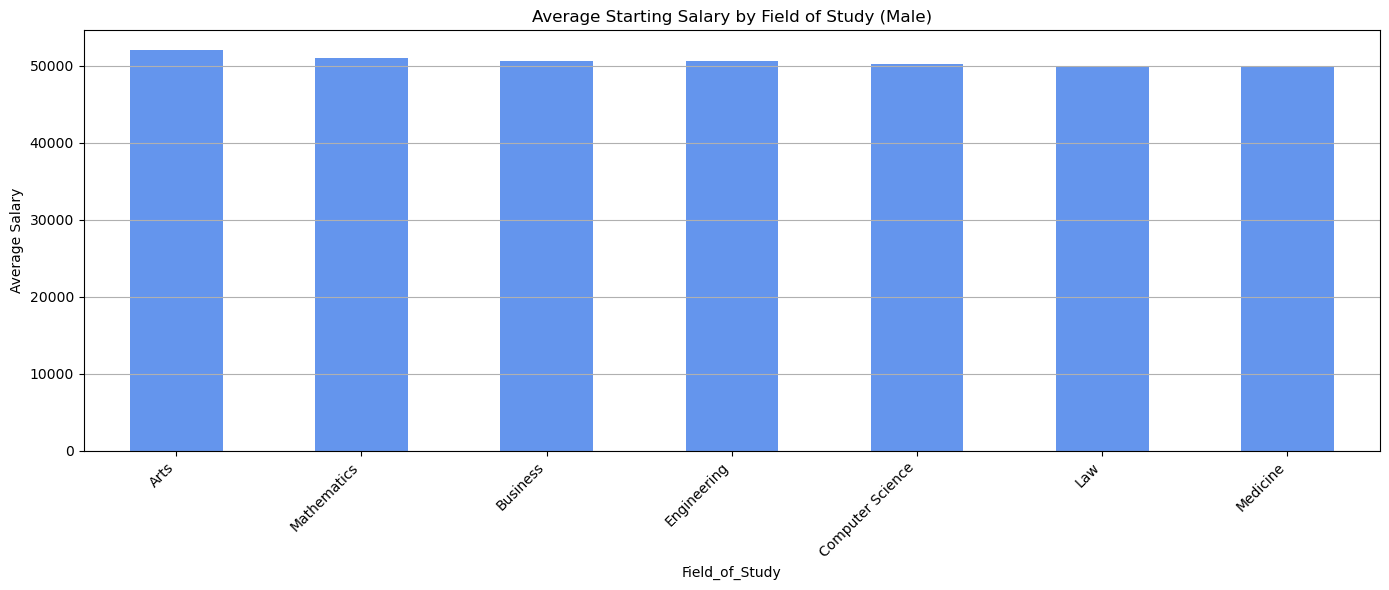

In [63]:
df_male = df[df['Gender'] == 'Male']

avg_salary_field_male = df_male.groupby('Field_of_Study')['Starting_Salary'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
avg_salary_field_male.plot(kind='bar', color='cornflowerblue')
plt.title('Average Starting Salary by Field of Study (Male)')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Further Analysis of Females vs Males Based on Fields of Study and Current Job levels vs Highest Average Salary

##### From the bar graphs above, it is difficult to clearly compare the top average salaries between genders. However, the fields in which each gender earns the highest average salaries are evident. To better illustrate these differences, I will group the top three fields with the highest average salaries for each gender. This will allow me to view the actual average values more clearly before proceeding with my analysis. I will also look at the current job levels, to determine where do males and/or females earn the highest average salary




In [99]:
# Filter by gender then calculate ave salary by field of study then segregate by top 3 fields

df_female = df[df['Gender'] == 'Female']

avg_salary_field_female = df_female.groupby('Field_of_Study')['Starting_Salary'].mean().sort_values(ascending=False)

top_3_female_fields = avg_salary_field_female.head(3)

top_3_female_fields_df = top_3_female_fields.reset_index()

import IPython.display as display
display.display(Markdown("#### Top 3 Fields with Highest Average Starting Salary for Females"))
display.display(top_3_female_fields_df)

#### Top 3 Fields with Highest Average Starting Salary for Females

,Field_of_Study,Starting_Salary
0,Computer Science,51463.057325
1,Medicine,50802.507837
2,Arts,50668.627451


In [101]:
df_male = df[df['Gender'] == 'Male']

avg_salary_field_male = df_male.groupby('Field_of_Study')['Starting_Salary'].mean().sort_values(ascending=False)

top_3_male_fields = avg_salary_field_male.head(3)

top_3_male_fields_df = top_3_male_fields.reset_index()

display.display(Markdown("#### Top 3 Fields with Highest Average Starting Salary for Males"))
display.display(top_3_male_fields_df)

#### Top 3 Fields with Highest Average Starting Salary for Males

,Field_of_Study,Starting_Salary
0,Arts,51988.648649
1,Mathematics,51007.671233
2,Business,50660.989011


In [94]:
job_level_order = ['Entry', 'Mid', 'Senior', 'Executive']

df['Current_Job_Level'] = pd.Categorical(df['Current_Job_Level'], categories=job_level_order, ordered=True)

avg_salary_by_level_gender = df.groupby(['Current_Job_Level', 'Gender'])['Starting_Salary'].mean().unstack()

avg_salary_by_level_gender = avg_salary_by_level_gender.sort_index()

styled_table = avg_salary_by_level_gender.style.set_table_styles(
    [
        {'selector': 'th', 'props': [('border', '1px solid black'), ('padding', '8px')]},
        {'selector': 'td', 'props': [('border', '1px solid black'), ('padding', '8px')]},
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '60%')]}
    ]
).format("${:,.2f}")

from IPython.display import display, Markdown
display(Markdown("#### Average Starting Salary by Gender and Job Level"))
display(styled_table)

/tmp/ipykernel_240/1861808297.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_by_level_gender = df.groupby(['Current_Job_Level', 'Gender'])['Starting_Salary'].mean().unstack()


#### Average Starting Salary by Gender and Job Level

Gender,Female,Male,Other
Current_Job_Level,,,
Entry,"$50,423.62","$50,544.53","$50,110.11"
Mid,"$50,768.72","$50,356.59","$50,006.25"
Senior,"$50,236.78","$51,712.37","$51,473.08"
Executive,"$51,241.67","$49,994.74","$43,192.31"


# Conclusions

##### The salaries in this dataset vary widely. With the standard deviation of 14, 494.96 this indicates that what these graduates' earn differ significantly. The coefficient variation equals to 28.67%. This means salaries vary by 28.67% from the average salary (this is quite high). So it is clear that some graduates are earning significantly higher than others (there are other factors that contribute to this though, i.e. entry level post vs mid or senior post and/or the field of study). These factors can also be explored represented in the graphs above and the average starting salary by gender and job level table. In this particular order; in Arts, Mathematics, and Business; male graduates have a higher average starting salary. In Computer Science, Medicine and Arts; female graduates have a higher average of a starting salary. Also female graduates have a higher starting salary average in executive roles compared to male graduates. While makes have a higher starting salary in entry level jobs compared to females. The majority of  salaries is concentrated around 50 000 USD, but a large portion of graduates earn exactly 25 000 USD (refer to the histogram reflecting the distribution of starting salaries). This also explains why the average is around 50k but the mode is 25k. Furthermore, we can also infer that; with the mode significantly lower, it suggests a large group of graduates is on the lower end of the salary spectrum. A few starting salaries of higher earning graduates is pulling the mean up, thus causing some right-skewing (however not extreme). The average starting salary of the graduates is a reliable indicator of overall earnings. I'm saying this because the mean (50,563.54) and median (50,300) are relatively close. which means its a balanced distribution. Also, the low standard error of (204.99) confirms that the sample mean is a good estimate of the overall population mean. With a kurtosis of -0.38 and a skewness of 0.21 it suggests there are a few high earners, but not too drastically. I could even further infer that, this also means the mean is not extremely distorted by the few 'very high' salaries(refer to the histogram above reflecting very few high earners).

#### Further than this we can also conclude in more detail, that:
* The lowest starting salary of a graduate in this dataset is 25 000
* The average starting salary of graduates in this dataset is 50 563.54
* The highets starting salary of a graduate in this dataset is 101 000
* Most graduates between the age of 18 and 29 in this dataset have a starting salary of  25 000
* The mi starting salaryalry in this dataset is 50 300, which indicates that half of the graduates earn below this amount
* The salary range is 76 000 (starting from 25 000- 101 000) - this suggests a wide spread of nearnigs. Also there is significant variation.

# Reflections

##### This task proved to be more challenging than the Excel assignment. I am already quite proficient with Excel, so I found it easier to begin that assignment, despite encountering a few obstacles along the way. Working with Python, however, presented more difficulties. I spent considerable time watching YouTube tutorials and researching code, particularly focusing on how to present my work in a visually appealing and clear manner for the reader. While Python proved to be more challenging, it ultimately provided more sophisticated visual representations of the data compared to Excel. In Excel, I had to think creatively to present the information, whereas Python allowed for a more logical, code-driven approach. Overall, despite the challenges, I found this to be an enjoyable assignment, and I look forward to further exploring Python in the future.